# Import important libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from shapely.geometry import Point

## Import datasets

In [2]:
df_listings = pd.read_csv("listings_summarize.csv")
df_listings

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2737,"Elif's room in cozy, clean flat.",3047,Elif,NaN,VIII Appia Antica,41.871360,12.482150,Private room,57.0,31,5,2015-05-08,0.04,6,365,0,NaN
1,11834,"Charming Boschetto Studio, Rome",44552,Serena,NaN,I Centro Storico,41.895447,12.491181,Entire home/apt,110.0,2,284,2025-07-05,1.62,1,295,30,IT058091C29VJSIZQZ
2,12398,Casa Donatello - Home far from Home,11756,Gea,NaN,II Parioli/Nomentano,41.925820,12.469280,Entire home/apt,124.0,3,85,2025-08-01,0.47,1,162,13,it058091c2kv6epw8f
3,19965,S. Peter's Square 5 Min WALK bright and quite ...,75450,Sabrina,NaN,I Centro Storico,41.908230,12.452930,Entire home/apt,162.0,3,178,2025-08-05,1.07,3,187,21,IT058091C20YD35BX2
4,19967,*In front Vatican Museums 2 bedrooms quite bri...,75450,Sabrina,NaN,I Centro Storico,41.908283,12.452617,Entire home/apt,150.0,3,46,2024-07-19,0.32,3,168,0,IT058091C20YD35BX2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37647,1508816683242128286,Residence Apartment Lucky Stars,554023719,Lucky,NaN,I Centro Storico,41.893540,12.505190,Entire home/apt,151.0,1,0,NaN,NaN,4,192,0,IT058091B4XPH449TB
37648,1509264731966854270,The Quirinale apartment,718755020,David,NaN,I Centro Storico,41.902630,12.491156,Entire home/apt,147.0,1,0,NaN,NaN,1,343,0,IT058091C2RGTLCJNR
37649,1509322278066021169,"Appartamento 3 camere, 3 bagni, balconi e cucina",9403439,Andrea,NaN,V Prenestino/Centocelle,41.865398,12.547593,Entire home/apt,225.0,1,0,NaN,NaN,8,28,0,IT058091C2DZHIDY6A
37650,1509392114869132219,appartamento residenziale,579802615,Domenico,NaN,I Centro Storico,41.893728,12.507961,Private room,72.0,2,0,NaN,NaN,2,353,0,it058091c2rf3ps25z


In [3]:
df_reviews = pd.read_csv("listings_summarize.csv")
df_reviews

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2737,"Elif's room in cozy, clean flat.",3047,Elif,NaN,VIII Appia Antica,41.871360,12.482150,Private room,57.0,31,5,2015-05-08,0.04,6,365,0,NaN
1,11834,"Charming Boschetto Studio, Rome",44552,Serena,NaN,I Centro Storico,41.895447,12.491181,Entire home/apt,110.0,2,284,2025-07-05,1.62,1,295,30,IT058091C29VJSIZQZ
2,12398,Casa Donatello - Home far from Home,11756,Gea,NaN,II Parioli/Nomentano,41.925820,12.469280,Entire home/apt,124.0,3,85,2025-08-01,0.47,1,162,13,it058091c2kv6epw8f
3,19965,S. Peter's Square 5 Min WALK bright and quite ...,75450,Sabrina,NaN,I Centro Storico,41.908230,12.452930,Entire home/apt,162.0,3,178,2025-08-05,1.07,3,187,21,IT058091C20YD35BX2
4,19967,*In front Vatican Museums 2 bedrooms quite bri...,75450,Sabrina,NaN,I Centro Storico,41.908283,12.452617,Entire home/apt,150.0,3,46,2024-07-19,0.32,3,168,0,IT058091C20YD35BX2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37647,1508816683242128286,Residence Apartment Lucky Stars,554023719,Lucky,NaN,I Centro Storico,41.893540,12.505190,Entire home/apt,151.0,1,0,NaN,NaN,4,192,0,IT058091B4XPH449TB
37648,1509264731966854270,The Quirinale apartment,718755020,David,NaN,I Centro Storico,41.902630,12.491156,Entire home/apt,147.0,1,0,NaN,NaN,1,343,0,IT058091C2RGTLCJNR
37649,1509322278066021169,"Appartamento 3 camere, 3 bagni, balconi e cucina",9403439,Andrea,NaN,V Prenestino/Centocelle,41.865398,12.547593,Entire home/apt,225.0,1,0,NaN,NaN,8,28,0,IT058091C2DZHIDY6A
37650,1509392114869132219,appartamento residenziale,579802615,Domenico,NaN,I Centro Storico,41.893728,12.507961,Private room,72.0,2,0,NaN,NaN,2,353,0,it058091c2rf3ps25z


In [4]:
df_neighbourhoods = pd.read_csv("neighbourhoods.csv")
df_neighbourhoods["neighbourhood"].values

array(['I Centro Storico', 'III Monte Sacro', 'II Parioli/Nomentano',
       'IV Tiburtina', 'IX Eur', 'VIII Appia Antica',
       'VII San Giovanni/Cinecittà', 'VI Roma delle Torri',
       'V Prenestino/Centocelle', 'XI Arvalia/Portuense', 'XIII Aurelia',
       'XII Monte Verde', 'XIV Monte Mario', 'X Ostia/Acilia',
       'XV Cassia/Flaminia'], dtype=object)

## Exploratory Data Analysis

In [5]:
# Check how many NaN values

In [6]:
df_listings.isna().sum()

id                                    0
name                                  0
host_id                               0
host_name                             8
neighbourhood_group               37652
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                              4088
minimum_nights                        0
number_of_reviews                     0
last_review                        5397
reviews_per_month                  5397
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                            3063
dtype: int64

In [7]:
# Check all host_names with NaN Values
df_listings[df_listings["host_name"].isna()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
3017,8834149,Irene's home. Bright apartament,46268435,NaN,NaN,VI Roma delle Torri,41.866350,12.584190,Entire home/apt,126.0,31,6,2021-07-29,0.05,1,362,0,NaN
10849,45646453,"R 1145 Amatos Apartment With Break Fast, Mini-...",194247046,NaN,NaN,I Centro Storico,41.920650,12.457030,Entire home/apt,150.0,31,0,NaN,NaN,5,364,0,NaN
10850,45646761,"R 1146 Bosco’s Family Room With Break Fast, Te...",194247046,NaN,NaN,I Centro Storico,41.918940,12.457270,Entire home/apt,306.0,31,0,NaN,NaN,5,364,0,NaN
10956,45761969,R 1164 Dante’s Suite Duplex With Central Heati...,194247046,NaN,NaN,I Centro Storico,41.899120,12.470350,Entire home/apt,356.0,31,0,NaN,NaN,5,364,0,NaN
11229,47793082,R 1166 Hotel Alba - Double/Twin Classic Room w...,194247046,NaN,NaN,I Centro Storico,41.902120,12.488620,Private room,138.0,31,0,NaN,NaN,5,364,0,NaN
11230,47793087,R 1168 Hotel Violetta (Double or Twin Room) wi...,194247046,NaN,NaN,I Centro Storico,41.904890,12.484550,Private room,150.0,31,0,NaN,NaN,5,364,0,NaN
31734,1352051912970160214,Easy Host Apt Almapetra Colosseo,677103700,NaN,NaN,I Centro Storico,41.891277,12.500056,Entire home/apt,208.0,2,0,NaN,NaN,2,218,0,IT058091B486FIY7EL
32060,1360024890693130906,Easy Host Apt Almapetra Fori,677103700,NaN,NaN,I Centro Storico,41.891337,12.482719,Entire home/apt,250.0,2,0,NaN,NaN,2,205,0,IT058091C2HIE8HXQ3


In [8]:
# Check if there are associated host_name values for its host_id
id_NaN = df_listings[df_listings["host_name"].isna()]["host_id"].values
id_NaN = list(dict.fromkeys(id_NaN))
id_NaN

[46268435, 194247046, 677103700]

In [9]:
df_listings[df_listings["host_id"].isin(id_NaN)]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
3017,8834149,Irene's home. Bright apartament,46268435,NaN,NaN,VI Roma delle Torri,41.866350,12.584190,Entire home/apt,126.0,31,6,2021-07-29,0.05,1,362,0,NaN
10849,45646453,"R 1145 Amatos Apartment With Break Fast, Mini-...",194247046,NaN,NaN,I Centro Storico,41.920650,12.457030,Entire home/apt,150.0,31,0,NaN,NaN,5,364,0,NaN
10850,45646761,"R 1146 Bosco’s Family Room With Break Fast, Te...",194247046,NaN,NaN,I Centro Storico,41.918940,12.457270,Entire home/apt,306.0,31,0,NaN,NaN,5,364,0,NaN
10956,45761969,R 1164 Dante’s Suite Duplex With Central Heati...,194247046,NaN,NaN,I Centro Storico,41.899120,12.470350,Entire home/apt,356.0,31,0,NaN,NaN,5,364,0,NaN
11229,47793082,R 1166 Hotel Alba - Double/Twin Classic Room w...,194247046,NaN,NaN,I Centro Storico,41.902120,12.488620,Private room,138.0,31,0,NaN,NaN,5,364,0,NaN
11230,47793087,R 1168 Hotel Violetta (Double or Twin Room) wi...,194247046,NaN,NaN,I Centro Storico,41.904890,12.484550,Private room,150.0,31,0,NaN,NaN,5,364,0,NaN
31734,1352051912970160214,Easy Host Apt Almapetra Colosseo,677103700,NaN,NaN,I Centro Storico,41.891277,12.500056,Entire home/apt,208.0,2,0,NaN,NaN,2,218,0,IT058091B486FIY7EL
32060,1360024890693130906,Easy Host Apt Almapetra Fori,677103700,NaN,NaN,I Centro Storico,41.891337,12.482719,Entire home/apt,250.0,2,0,NaN,NaN,2,205,0,IT058091C2HIE8HXQ3


As seen in the results, the host_name are all NaN for all NaN values in host_id

In [10]:
# Rename theme for temporary. # Since it is only 3, we add 3 temporary host names
new_host_names = [f'Temp Host {i+1}' for i in range(len(id_NaN))]

id_to_name_map = dict(zip(id_NaN, new_host_names,))

id_to_name_map

{46268435: 'Temp Host 1', 194247046: 'Temp Host 2', 677103700: 'Temp Host 3'}

In [11]:
# use fillna() with .map() of host_id
df_listings["host_name"] = df_listings["host_name"].fillna(df_listings["host_id"].map(id_to_name_map))


In [12]:
df_listings[df_listings["host_id"].isin(id_NaN)]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
3017,8834149,Irene's home. Bright apartament,46268435,Temp Host 1,NaN,VI Roma delle Torri,41.866350,12.584190,Entire home/apt,126.0,31,6,2021-07-29,0.05,1,362,0,NaN
10849,45646453,"R 1145 Amatos Apartment With Break Fast, Mini-...",194247046,Temp Host 2,NaN,I Centro Storico,41.920650,12.457030,Entire home/apt,150.0,31,0,NaN,NaN,5,364,0,NaN
10850,45646761,"R 1146 Bosco’s Family Room With Break Fast, Te...",194247046,Temp Host 2,NaN,I Centro Storico,41.918940,12.457270,Entire home/apt,306.0,31,0,NaN,NaN,5,364,0,NaN
10956,45761969,R 1164 Dante’s Suite Duplex With Central Heati...,194247046,Temp Host 2,NaN,I Centro Storico,41.899120,12.470350,Entire home/apt,356.0,31,0,NaN,NaN,5,364,0,NaN
11229,47793082,R 1166 Hotel Alba - Double/Twin Classic Room w...,194247046,Temp Host 2,NaN,I Centro Storico,41.902120,12.488620,Private room,138.0,31,0,NaN,NaN,5,364,0,NaN
11230,47793087,R 1168 Hotel Violetta (Double or Twin Room) wi...,194247046,Temp Host 2,NaN,I Centro Storico,41.904890,12.484550,Private room,150.0,31,0,NaN,NaN,5,364,0,NaN
31734,1352051912970160214,Easy Host Apt Almapetra Colosseo,677103700,Temp Host 3,NaN,I Centro Storico,41.891277,12.500056,Entire home/apt,208.0,2,0,NaN,NaN,2,218,0,IT058091B486FIY7EL
32060,1360024890693130906,Easy Host Apt Almapetra Fori,677103700,Temp Host 3,NaN,I Centro Storico,41.891337,12.482719,Entire home/apt,250.0,2,0,NaN,NaN,2,205,0,IT058091C2HIE8HXQ3


In [13]:
# TO DO: Investigate why more than 10% of data have NaN price

In [14]:
df_listings[df_listings["price"].isna()]["availability_365"].value_counts()

availability_365
0      2094
364      85
1        53
365      34
269      34
       ... 
201       1
184       1
130       1
200       1
25        1
Name: count, Length: 358, dtype: int64

In [15]:
# TO DO: Clean last_reviews column [DONE] - ANSWER : DO NOT DROP SINCE IT IS NEEDED
df_listings

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2737,"Elif's room in cozy, clean flat.",3047,Elif,NaN,VIII Appia Antica,41.871360,12.482150,Private room,57.0,31,5,2015-05-08,0.04,6,365,0,NaN
1,11834,"Charming Boschetto Studio, Rome",44552,Serena,NaN,I Centro Storico,41.895447,12.491181,Entire home/apt,110.0,2,284,2025-07-05,1.62,1,295,30,IT058091C29VJSIZQZ
2,12398,Casa Donatello - Home far from Home,11756,Gea,NaN,II Parioli/Nomentano,41.925820,12.469280,Entire home/apt,124.0,3,85,2025-08-01,0.47,1,162,13,it058091c2kv6epw8f
3,19965,S. Peter's Square 5 Min WALK bright and quite ...,75450,Sabrina,NaN,I Centro Storico,41.908230,12.452930,Entire home/apt,162.0,3,178,2025-08-05,1.07,3,187,21,IT058091C20YD35BX2
4,19967,*In front Vatican Museums 2 bedrooms quite bri...,75450,Sabrina,NaN,I Centro Storico,41.908283,12.452617,Entire home/apt,150.0,3,46,2024-07-19,0.32,3,168,0,IT058091C20YD35BX2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37647,1508816683242128286,Residence Apartment Lucky Stars,554023719,Lucky,NaN,I Centro Storico,41.893540,12.505190,Entire home/apt,151.0,1,0,NaN,NaN,4,192,0,IT058091B4XPH449TB
37648,1509264731966854270,The Quirinale apartment,718755020,David,NaN,I Centro Storico,41.902630,12.491156,Entire home/apt,147.0,1,0,NaN,NaN,1,343,0,IT058091C2RGTLCJNR
37649,1509322278066021169,"Appartamento 3 camere, 3 bagni, balconi e cucina",9403439,Andrea,NaN,V Prenestino/Centocelle,41.865398,12.547593,Entire home/apt,225.0,1,0,NaN,NaN,8,28,0,IT058091C2DZHIDY6A
37650,1509392114869132219,appartamento residenziale,579802615,Domenico,NaN,I Centro Storico,41.893728,12.507961,Private room,72.0,2,0,NaN,NaN,2,353,0,it058091c2rf3ps25z


In [16]:
# last_reviews and reviews per month are NaN because there are no reviews for the listing. 
# Leave last_reviews as NaN, and last_reviews as 0

In [17]:
df_listings["reviews_per_month"] = df_listings["reviews_per_month"].fillna(0)

In [18]:
# final cout
df_listings.isna().sum()

id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group               37652
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                              4088
minimum_nights                        0
number_of_reviews                     0
last_review                        5397
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                            3063
dtype: int64

In [19]:
df_listings.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

In [20]:
df_listings["room_type"].value_counts()

room_type
Entire home/apt    28294
Private room        8887
Hotel room           370
Shared room          101
Name: count, dtype: int64

In [21]:
# Check price value

In [22]:
min_price_listing = df_listings["price"].min()
max_price_listing = df_listings["price"].max()

print(f"{min_price_listing} - {max_price_listing}")

8.0 - 10515.0


In [23]:
df_listings["price"].mean()


197.32800023835063

In [24]:
df_listings["price"].describe().round(2)

count    33564.00
mean       197.33
std        443.19
min          8.00
25%         93.00
50%        133.00
75%        195.25
max      10515.00
Name: price, dtype: float64

In [25]:
df_listings["minimum_nights"].value_counts()

minimum_nights
1      13952
2      13052
3       5608
31      3606
4        709
5        268
7        106
6         65
90        27
30        27
365       25
32        23
10        23
15        19
60        17
20        15
28        11
14        10
360        8
180        8
100        6
170        5
120        5
45         4
29         4
35         4
21         3
40         3
8          3
364        3
150        3
25         2
50         2
730        2
56         2
110        1
24         1
12         1
41         1
11         1
63         1
27         1
311        1
350        1
70         1
105        1
26         1
99         1
200        1
55         1
300        1
58         1
179        1
186        1
720        1
80         1
280        1
Name: count, dtype: int64

## Feature Engineering

In [26]:
# TO DO: Create a new column indicating if it is short rental or not
# For this we say if minimum_nights < 31

df_listings["is_short_term"] = df_listings["minimum_nights"] <= 31

In [27]:
df_listings

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,is_short_term
0,2737,"Elif's room in cozy, clean flat.",3047,Elif,NaN,VIII Appia Antica,41.871360,12.482150,Private room,57.0,31,5,2015-05-08,0.04,6,365,0,NaN,True
1,11834,"Charming Boschetto Studio, Rome",44552,Serena,NaN,I Centro Storico,41.895447,12.491181,Entire home/apt,110.0,2,284,2025-07-05,1.62,1,295,30,IT058091C29VJSIZQZ,True
2,12398,Casa Donatello - Home far from Home,11756,Gea,NaN,II Parioli/Nomentano,41.925820,12.469280,Entire home/apt,124.0,3,85,2025-08-01,0.47,1,162,13,it058091c2kv6epw8f,True
3,19965,S. Peter's Square 5 Min WALK bright and quite ...,75450,Sabrina,NaN,I Centro Storico,41.908230,12.452930,Entire home/apt,162.0,3,178,2025-08-05,1.07,3,187,21,IT058091C20YD35BX2,True
4,19967,*In front Vatican Museums 2 bedrooms quite bri...,75450,Sabrina,NaN,I Centro Storico,41.908283,12.452617,Entire home/apt,150.0,3,46,2024-07-19,0.32,3,168,0,IT058091C20YD35BX2,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37647,1508816683242128286,Residence Apartment Lucky Stars,554023719,Lucky,NaN,I Centro Storico,41.893540,12.505190,Entire home/apt,151.0,1,0,NaN,0.00,4,192,0,IT058091B4XPH449TB,True
37648,1509264731966854270,The Quirinale apartment,718755020,David,NaN,I Centro Storico,41.902630,12.491156,Entire home/apt,147.0,1,0,NaN,0.00,1,343,0,IT058091C2RGTLCJNR,True
37649,1509322278066021169,"Appartamento 3 camere, 3 bagni, balconi e cucina",9403439,Andrea,NaN,V Prenestino/Centocelle,41.865398,12.547593,Entire home/apt,225.0,1,0,NaN,0.00,8,28,0,IT058091C2DZHIDY6A,True
37650,1509392114869132219,appartamento residenziale,579802615,Domenico,NaN,I Centro Storico,41.893728,12.507961,Private room,72.0,2,0,NaN,0.00,2,353,0,it058091c2rf3ps25z,True


In [28]:
# You can filter out for rentals that are short term (minimum number of nights is 1 month)
df_listings[df_listings["is_short_term"] == False]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,is_short_term
73,282929,Bright & cozy double room in Rome,1474010,Rosanna E Daniele,NaN,VII San Giovanni/Cinecittà,41.857840,12.557640,Private room,26.0,350,12,2015-08-08,0.07,1,257,0,NaN,False
96,53203,"Sanniti apartment, San Lorenzo stylish top floor",247495,Gabriele,NaN,II Parioli/Nomentano,41.898050,12.515630,Entire home/apt,108.0,90,101,2024-09-02,0.56,1,46,0,IT058091C2IBQXC78S,False
237,588080,ENCHANTING ROMAN VILLA WITH POOL,1528063,Chiara,NaN,XV Cassia/Flaminia,41.976860,12.428090,Entire home/apt,168.0,60,17,2016-08-23,0.11,1,304,0,NaN,False
241,158761,DELIGHTFUL & COZY FLAT Trastevere,761827,Dorotea,NaN,I Centro Storico,41.886030,12.468280,Entire home/apt,90.0,360,8,2017-04-19,0.06,18,363,0,NaN,False
316,426237,Blue double room with private bath,1775004,Irina,NaN,II Parioli/Nomentano,41.913880,12.503050,Private room,89.0,32,127,2024-10-21,0.84,2,350,3,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36502,1465087642416993184,Stanza condivisa - Posto letto (Portuense),707059803,Gianluigi,NaN,XI Arvalia/Portuense,41.862410,12.459120,Shared room,20.0,90,0,NaN,0.00,4,259,0,NaN,False
36505,1465094446743516993,Stanza doppia uso singola (Portuense),707059803,Gianluigi,NaN,XI Arvalia/Portuense,41.862200,12.459230,Private room,28.0,90,0,NaN,0.00,4,227,0,NaN,False
36506,1465097027869511375,Stanza con bagno privato (Portuense),707059803,Gianluigi,NaN,XI Arvalia/Portuense,41.862110,12.459520,Private room,32.0,90,0,NaN,0.00,4,318,0,NaN,False
37277,1495484953051801925,HospitalityrRome San Lorenzo,654762984,Massimo,NaN,II Parioli/Nomentano,41.896180,12.513222,Entire home/apt,75.0,60,0,NaN,0.00,2,254,0,IT058091C2EDTB459N,False


In [29]:
df_listings["renter_type"] = ["business" if x > 1 else "casual" for x in df_listings['calculated_host_listings_count']]

In [30]:
df_listings[["id", "name", "host_id", "host_name","renter_type"]]

,id,name,host_id,host_name,renter_type
0,2737,"Elif's room in cozy, clean flat.",3047,Elif,business
1,11834,"Charming Boschetto Studio, Rome",44552,Serena,casual
2,12398,Casa Donatello - Home far from Home,11756,Gea,casual
3,19965,S. Peter's Square 5 Min WALK bright and quite ...,75450,Sabrina,business
4,19967,*In front Vatican Museums 2 bedrooms quite bri...,75450,Sabrina,business
...,...,...,...,...,...
37647,1508816683242128286,Residence Apartment Lucky Stars,554023719,Lucky,business
37648,1509264731966854270,The Quirinale apartment,718755020,David,casual
37649,1509322278066021169,"Appartamento 3 camere, 3 bagni, balconi e cucina",9403439,Andrea,business
37650,1509392114869132219,appartamento residenziale,579802615,Domenico,business


In [31]:
# You can get number of individual hosts
# You can get number of hosts who has multiple listings
# You can get number of hosts who dont have a license depending if they are casual or not
df_listings

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,is_short_term,renter_type
0,2737,"Elif's room in cozy, clean flat.",3047,Elif,NaN,VIII Appia Antica,41.871360,12.482150,Private room,57.0,31,5,2015-05-08,0.04,6,365,0,NaN,True,business
1,11834,"Charming Boschetto Studio, Rome",44552,Serena,NaN,I Centro Storico,41.895447,12.491181,Entire home/apt,110.0,2,284,2025-07-05,1.62,1,295,30,IT058091C29VJSIZQZ,True,casual
2,12398,Casa Donatello - Home far from Home,11756,Gea,NaN,II Parioli/Nomentano,41.925820,12.469280,Entire home/apt,124.0,3,85,2025-08-01,0.47,1,162,13,it058091c2kv6epw8f,True,casual
3,19965,S. Peter's Square 5 Min WALK bright and quite ...,75450,Sabrina,NaN,I Centro Storico,41.908230,12.452930,Entire home/apt,162.0,3,178,2025-08-05,1.07,3,187,21,IT058091C20YD35BX2,True,business
4,19967,*In front Vatican Museums 2 bedrooms quite bri...,75450,Sabrina,NaN,I Centro Storico,41.908283,12.452617,Entire home/apt,150.0,3,46,2024-07-19,0.32,3,168,0,IT058091C20YD35BX2,True,business
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37647,1508816683242128286,Residence Apartment Lucky Stars,554023719,Lucky,NaN,I Centro Storico,41.893540,12.505190,Entire home/apt,151.0,1,0,NaN,0.00,4,192,0,IT058091B4XPH449TB,True,business
37648,1509264731966854270,The Quirinale apartment,718755020,David,NaN,I Centro Storico,41.902630,12.491156,Entire home/apt,147.0,1,0,NaN,0.00,1,343,0,IT058091C2RGTLCJNR,True,casual
37649,1509322278066021169,"Appartamento 3 camere, 3 bagni, balconi e cucina",9403439,Andrea,NaN,V Prenestino/Centocelle,41.865398,12.547593,Entire home/apt,225.0,1,0,NaN,0.00,8,28,0,IT058091C2DZHIDY6A,True,business
37650,1509392114869132219,appartamento residenziale,579802615,Domenico,NaN,I Centro Storico,41.893728,12.507961,Private room,72.0,2,0,NaN,0.00,2,353,0,it058091c2rf3ps25z,True,business


In [32]:
# Drop neighbourhood_group as neighbourhood column already serves that purpose, and neighbourhood is already the highest group that could be done in Rome
df_listings = df_listings.drop(['neighbourhood_group'], axis=1)

In [33]:
# final count
df_listings.isna().sum()

id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                             4088
minimum_nights                       0
number_of_reviews                    0
last_review                       5397
reviews_per_month                    0
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                           3063
is_short_term                        0
renter_type                          0
dtype: int64

## Data Analysis

### Main Research Question 1

#### 1. What are the pricing and popularity hotspots in Rome

In [34]:
# Import libraries
import os
import pyproj
import matplotlib.pyplot as plt

In [35]:
# Fixing issue in personal laptop where geopandas library can't be loaded. (Must be done everytime)

# Ask pyproj where the data directory is
path_to_proj_data = pyproj.datadir.get_data_dir()

# Force the environment variable to use this path
os.environ['PROJ_LIB'] = path_to_proj_data

# Now import geopandas
import geopandas as gpd

print(f"PROJ data found at: {path_to_proj_data}")

# Load your file
df_geo_rome = gpd.read_file("neighbourhoods.geojson")

PROJ data found at: /home/matthew/.workspaces/miniconda3/envs/ds-env/share/proj


In [36]:
# Turn CSV into GeoDF
df_geo_listings = gpd.GeoDataFrame(df_listings,
                                   geometry=gpd.points_from_xy(df_listings["longitude"], df_listings["latitude"]),
                                   crs="EPSG:4326"
                                  )


In [37]:
# Ensure both map layers use the same projection (Required!)
df_geo_listings = df_geo_listings.to_crs(df_geo_rome.crs)

joined = gpd.sjoin(df_geo_listings, df_geo_rome, how="inner", predicate="within")

# Count the points per neighbourhood
counts = joined.groupby(by="neighbourhood_right").size().reset_index(name='point_count')

# Merge the counts back into the original neighbourhood map
final_map_count_hotspot = df_geo_rome.merge(counts, left_on="neighbourhood", right_on="neighbourhood_right", how='left')

# Fill NaN values with 0 (for neighbourhoods with no points)
final_map_count_hotspot['point_count'] = final_map_count_hotspot['point_count'].fillna(0)

In [62]:
final_map_count_hotspot.sort_values(by="point_count", ascending=False)[["neighbourhood", "point_count"]]

,neighbourhood,point_count
0,I Centro Storico,18562
4,VII San Giovanni/Cinecittà,3264
10,XIII Aurelia,2675
14,II Parioli/Nomentano,2619
9,XII Monte Verde,2014
13,V Prenestino/Centocelle,1888
5,VIII Appia Antica,1217
7,X Ostia/Acilia,1049
11,XIV Monte Mario,864
8,XI Arvalia/Portuense,781


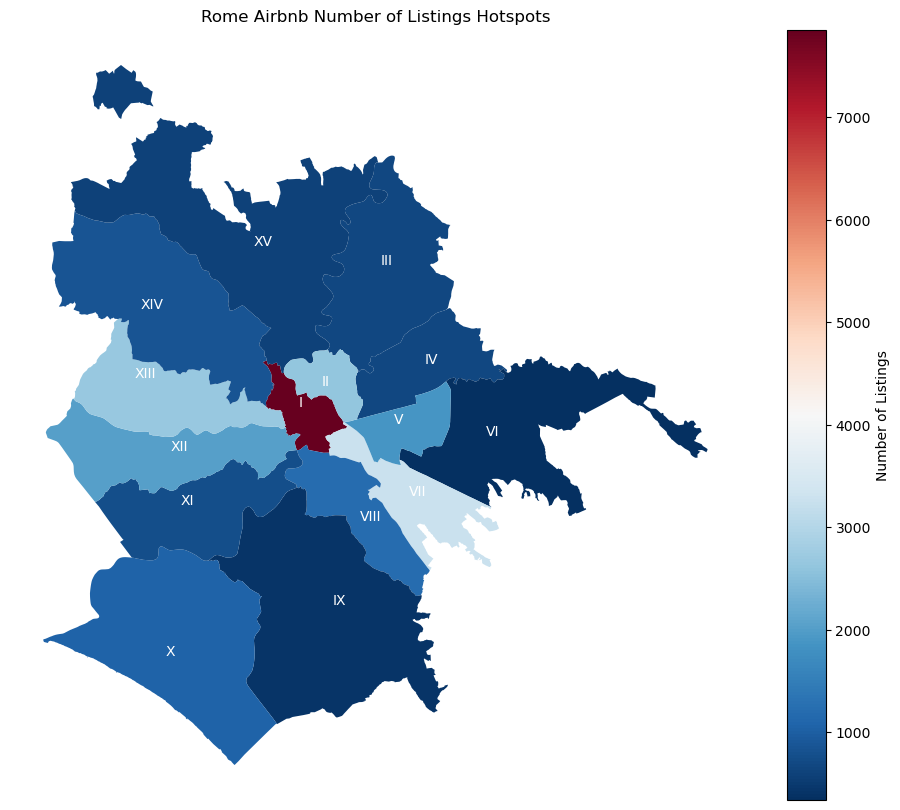

In [39]:
# Note this only answers chloroplot map of how many dots are per neighbourhood

fig, ax = plt.subplots(1, 1, figsize=(12, 10))

upper_limit = final_map_count_hotspot['point_count'].quantile(0.95)

final_map_count_hotspot.plot(column='point_count',
                             ax=ax,
                             legend=True,
                             legend_kwds={'label': "Number of Listings"},
                             cmap='RdBu_r',
                             vmax=upper_limit)

# Add Labels
for idx, row in final_map_count_hotspot.iterrows():
    xy = row['geometry'].representative_point().coords[0]
    
    ax.annotate(text=row['neighbourhood'].split(' ')[0], 
                xy=xy, 
                horizontalalignment='center', 
                fontsize=10, 
                color='white'
               )

ax.set_title('Rome Airbnb Number of Listings Hotspots')
ax.set_axis_off()
plt.savefig('1-1.png')
plt.show()

In [40]:
# Scaling Factor: If you have 10,000 listings, drawing 10,000 dots might be slow/messy.
listings_per_dot = 2
to_keep = 1 / listings_per_dot

sampled_df = df_geo_listings.sample(frac=to_keep, random_state=42)

# sampled_df["median_price"] = sampled_df.groupby(by="neighbourhood").median()
median_prices = sampled_df.groupby(by="neighbourhood")["price"].median()
median_prices = median_prices.reset_index()

median_prices

,neighbourhood,price
0,I Centro Storico,172.0
1,II Parioli/Nomentano,120.0
2,III Monte Sacro,90.0
3,IV Tiburtina,84.0
4,IX Eur,94.0
5,V Prenestino/Centocelle,80.0
6,VI Roma delle Torri,76.0
7,VII San Giovanni/Cinecittà,103.0
8,VIII Appia Antica,101.0
9,X Ostia/Acilia,90.0


In [41]:
sampled_df = sampled_df.merge(median_prices, on="neighbourhood", how="left")
sampled_df

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price_x,minimum_nights,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,is_short_term,renter_type,geometry,price_y
0,40884056,Mor&Hodaya,314167308,Shoval,II Parioli/Nomentano,41.910120,12.519770,Entire home/apt,NaN,31,...,NaN,0.00,1,0,0,NaN,True,casual,POINT (12.51977 41.91012),120.0
1,1011553579209450226,Luminoso appartamento,518920770,HostMe,XI Arvalia/Portuense,41.861740,12.463970,Entire home/apt,NaN,2,...,2025-02-01,0.11,1,256,1,IT058091C2KO7D6MNS,True,casual,POINT (12.46397 41.86174),86.0
2,27536490,"Stanza con bagno privato vicino IFAD, INPS, EUR",84055901,Alessandra,VIII Appia Antica,41.839680,12.487210,Private room,93.0,1,...,2024-05-27,0.25,1,178,0,IT058091C2XDLKQOG9,True,casual,POINT (12.48721 41.83968),101.0
3,1121567560326602554,A fine Italian romance in Rome,569199327,Silvia,XII Monte Verde,41.885429,12.420819,Entire home/apt,104.0,3,...,NaN,0.00,1,365,0,IT058091C2CZSZB96G,True,casual,POINT (12.42082 41.88543),107.0
4,1414421386461541119,loft zeno metro conca d'oro,693824032,Lorenzo,III Monte Sacro,41.943669,12.523701,Entire home/apt,100.0,1,...,2025-08-03,1.14,2,310,3,IT058091B4GU6G6TJ8,True,business,POINT (12.5237 41.94367),90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18821,2077017,Opera Luxury Rosmini | Monti deluxe –A/C & Com...,7492655,Claudia,I Centro Storico,41.900810,12.497960,Entire home/apt,180.0,2,...,2025-09-12,2.17,2,309,32,IT058091C2E3444WZC,True,business,POINT (12.49796 41.90081),172.0
18822,26891270,Rome Spanish Steps : Wide Apartment Up to 7 Pe...,18244054,Alessandro,I Centro Storico,41.904388,12.483000,Entire home/apt,450.0,3,...,2025-09-08,2.58,1,290,23,IT058091C2ZCHBKVVU,True,casual,POINT (12.483 41.90439),172.0
18823,817260983972044327,Superior Double BDB Rooms Trastevere,496407758,Sebastian,I Centro Storico,41.890790,12.468910,Private room,232.0,1,...,2025-08-15,1.01,11,345,22,IT058091B4CLINZFYE,True,business,POINT (12.46891 41.89079),172.0
18824,1129604271470149285,Piacentino Homes San Giovanni apartment,243676962,Dino,VII San Giovanni/Cinecittà,41.886730,12.520170,Entire home/apt,100.0,1,...,2025-08-14,1.20,20,337,8,IT058091B4IKWN27JW,True,business,POINT (12.52017 41.88673),103.0


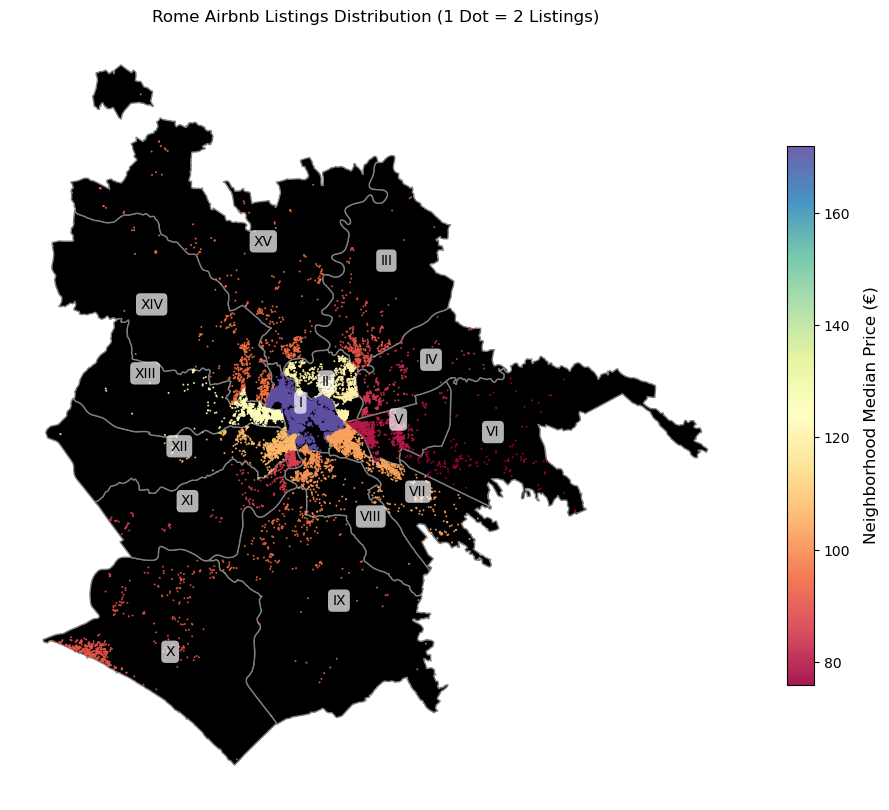

In [42]:
# --- PLOTTING ---
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

final_map_count_hotspot.plot(ax=ax, color='#000000', edgecolor='#808080')

upper_limit = sampled_df["price_y"].quantile(0.90)

scatter_density_price = ax.scatter(
    x=sampled_df["longitude"],
    y=sampled_df["latitude"],
    s=2,
    c=sampled_df["price_y"],
    cmap='Spectral',
    alpha=0.9,
    linewidth=0,
    vmax=upper_limit
)

cbar = plt.colorbar(scatter_density_price, ax=ax, shrink=0.7) 

# Add Color Legend
cbar.set_label('Neighborhood Median Price (€)', fontsize=12, labelpad=10)

# Add Labels
for idx, row in final_map_count_hotspot.iterrows():
    xy = row['geometry'].representative_point().coords[0]
    
    ax.annotate(
        text=row['neighbourhood'].split(' ')[0], 
        xy=xy, 
        horizontalalignment='center', 
        fontsize=10, 
        color='black',
        bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="none", alpha=0.7)
        )
        

ax.set_title(f'Rome Airbnb Listings Distribution (1 Dot = {listings_per_dot} Listings)', fontsize=12)
ax.set_axis_off()
plt.savefig('1-1_dot_density.png', dpi=300) 
plt.show()

In [43]:
neighbourhood_stats = joined.groupby('neighbourhood_right')[['price', 'number_of_reviews_ltm']].median().reset_index()
neighbourhood_stats.rename(columns={
    'neighbourhood_right':'neighbourhood',
    'price': 'median_price', 
    'number_of_reviews_ltm': 'median_reviews'
}, inplace=True)

In [44]:
final_map_pricing_hotspot = df_geo_rome.merge(neighbourhood_stats, left_on="neighbourhood", right_on="neighbourhood", how='left')

In [63]:
final_map_pricing_hotspot.sort_values(by="median_price", ascending=False)[["neighbourhood", "median_price"]]

,neighbourhood,median_price
0,I Centro Storico,173.0
10,XIII Aurelia,122.0
14,II Parioli/Nomentano,119.0
9,XII Monte Verde,108.0
4,VII San Giovanni/Cinecittà,104.0
5,VIII Appia Antica,102.0
11,XIV Monte Mario,97.0
12,XV Cassia/Flaminia,97.0
6,IX Eur,92.0
1,III Monte Sacro,90.0


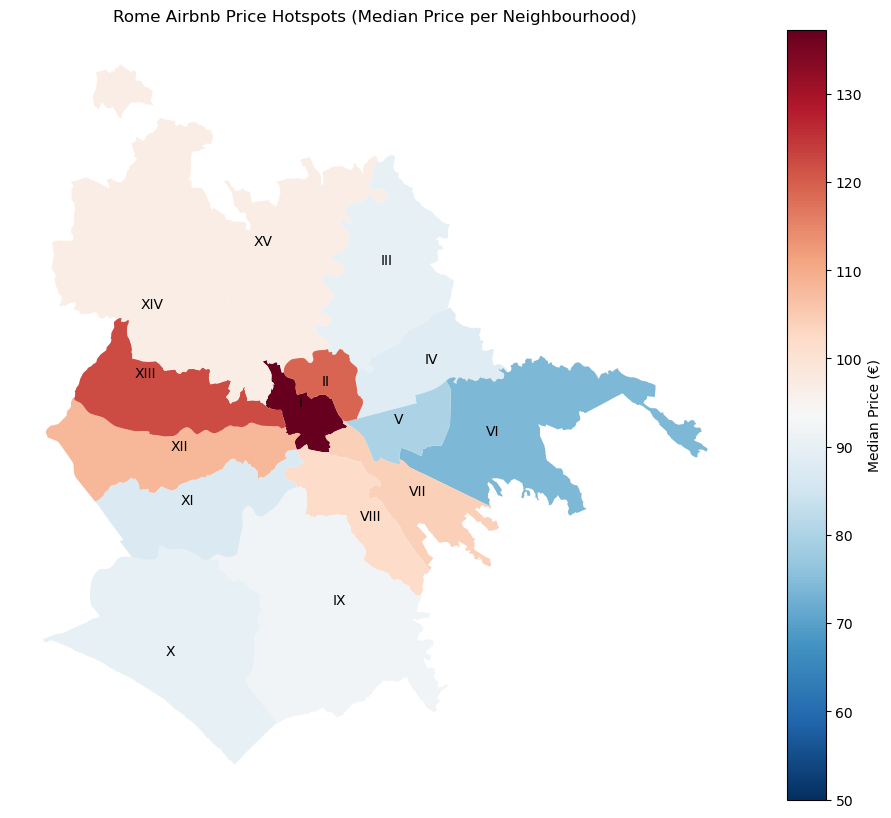

In [46]:
upper_limit = final_map_pricing_hotspot['median_price'].quantile(0.95)

fig, ax = plt.subplots(1, 1, figsize=(12, 10))
final_map_pricing_hotspot.plot(
    column='median_price', 
    ax=ax, 
    legend=True,
    legend_kwds={'label': "Median Price (€)"},
    cmap='RdBu_r',
    vmin=50,
    vmax=upper_limit
)

# Add Labels
for idx, row in final_map_count_hotspot.iterrows():
    xy = row['geometry'].representative_point().coords[0]
    
    ax.annotate(text=row['neighbourhood'].split(' ')[0], 
                xy=xy, 
                horizontalalignment='center', 
                fontsize=10, 
                color='black'
               )

ax.set_title('Rome Airbnb Price Hotspots (Median Price per Neighbourhood)')
ax.set_axis_off()
plt.savefig("1-2.png")
plt.show()

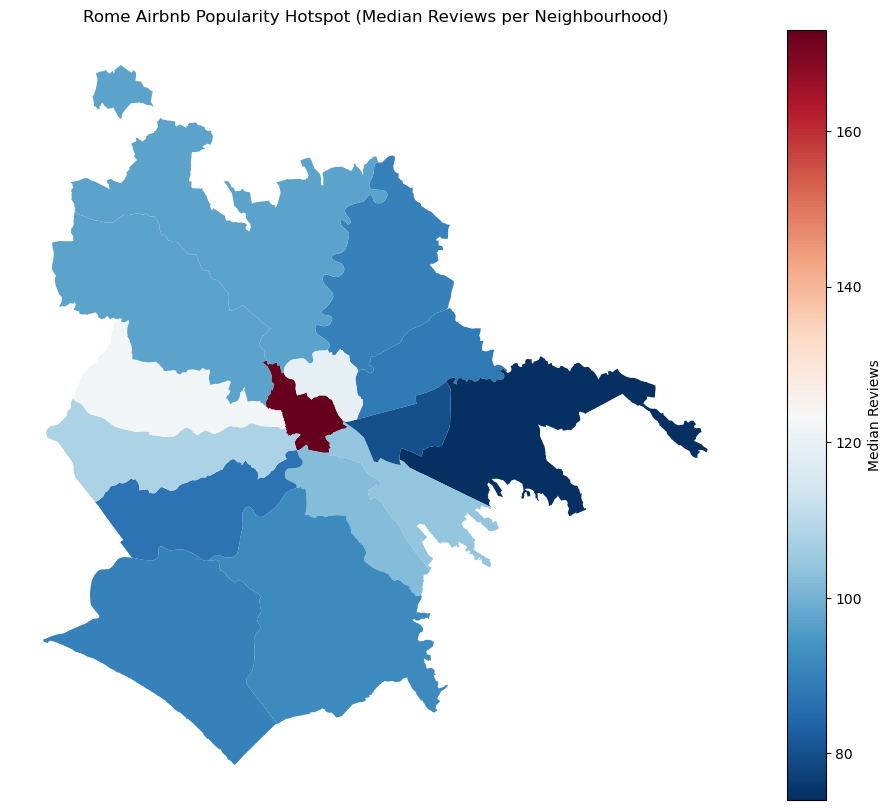

In [47]:
final_map = df_geo_rome.merge(neighbourhood_stats, left_on="neighbourhood", right_on="neighbourhood", how='left')

upper_limit = final_map['median_reviews'].quantile(0.95)

fig, ax = plt.subplots(1, 1, figsize=(12, 10))
final_map.plot(
    column='median_price', 
    ax=ax, 
    legend=True,
    legend_kwds={'label': "Median Reviews"},
    cmap='RdBu_r',       # 'viridis', 'plasma', or 'coolwarm' are good for prices
)

ax.set_title('Rome Airbnb Popularity Hotspot (Median Reviews per Neighbourhood)')
ax.set_axis_off() # Hide axis numbers
plt.savefig("1-3.png")
plt.show()

## 2. What is the dominant type of listing in each neighbourhood, and who is offering it?

In [48]:
df_listings

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,is_short_term,renter_type
0,2737,"Elif's room in cozy, clean flat.",3047,Elif,VIII Appia Antica,41.871360,12.482150,Private room,57.0,31,5,2015-05-08,0.04,6,365,0,NaN,True,business
1,11834,"Charming Boschetto Studio, Rome",44552,Serena,I Centro Storico,41.895447,12.491181,Entire home/apt,110.0,2,284,2025-07-05,1.62,1,295,30,IT058091C29VJSIZQZ,True,casual
2,12398,Casa Donatello - Home far from Home,11756,Gea,II Parioli/Nomentano,41.925820,12.469280,Entire home/apt,124.0,3,85,2025-08-01,0.47,1,162,13,it058091c2kv6epw8f,True,casual
3,19965,S. Peter's Square 5 Min WALK bright and quite ...,75450,Sabrina,I Centro Storico,41.908230,12.452930,Entire home/apt,162.0,3,178,2025-08-05,1.07,3,187,21,IT058091C20YD35BX2,True,business
4,19967,*In front Vatican Museums 2 bedrooms quite bri...,75450,Sabrina,I Centro Storico,41.908283,12.452617,Entire home/apt,150.0,3,46,2024-07-19,0.32,3,168,0,IT058091C20YD35BX2,True,business
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37647,1508816683242128286,Residence Apartment Lucky Stars,554023719,Lucky,I Centro Storico,41.893540,12.505190,Entire home/apt,151.0,1,0,NaN,0.00,4,192,0,IT058091B4XPH449TB,True,business
37648,1509264731966854270,The Quirinale apartment,718755020,David,I Centro Storico,41.902630,12.491156,Entire home/apt,147.0,1,0,NaN,0.00,1,343,0,IT058091C2RGTLCJNR,True,casual
37649,1509322278066021169,"Appartamento 3 camere, 3 bagni, balconi e cucina",9403439,Andrea,V Prenestino/Centocelle,41.865398,12.547593,Entire home/apt,225.0,1,0,NaN,0.00,8,28,0,IT058091C2DZHIDY6A,True,business
37650,1509392114869132219,appartamento residenziale,579802615,Domenico,I Centro Storico,41.893728,12.507961,Private room,72.0,2,0,NaN,0.00,2,353,0,it058091c2rf3ps25z,True,business


In [49]:
df_listings_type = pd.crosstab(df_listings['neighbourhood'], df_listings['room_type'], normalize='index')
df_listings_type *= 100
# df_listings_type = df_listings_type.reset_index()
# df_listings_type = df_listings_type.melt(
#     id_vars='neighbourhood',
#     var_name='room_type',
#     value_name='Percentage'
# )

df_listings_type

room_type,Entire home/apt,Hotel room,Private room,Shared room
neighbourhood,,,,
I Centro Storico,74.422238,1.497603,23.843129,0.237031
II Parioli/Nomentano,73.577701,0.687285,25.620466,0.114548
III Monte Sacro,76.233184,0.747384,23.019432,0.000000
IV Tiburtina,65.739385,0.000000,34.114202,0.146413
IX Eur,78.773585,0.235849,20.990566,0.000000
V Prenestino/Centocelle,76.112288,0.000000,22.563559,1.324153
VI Roma delle Torri,69.501466,0.000000,28.445748,2.052786
VII San Giovanni/Cinecittà,73.927696,0.674020,25.367647,0.030637
VIII Appia Antica,70.008217,0.328677,29.580937,0.082169


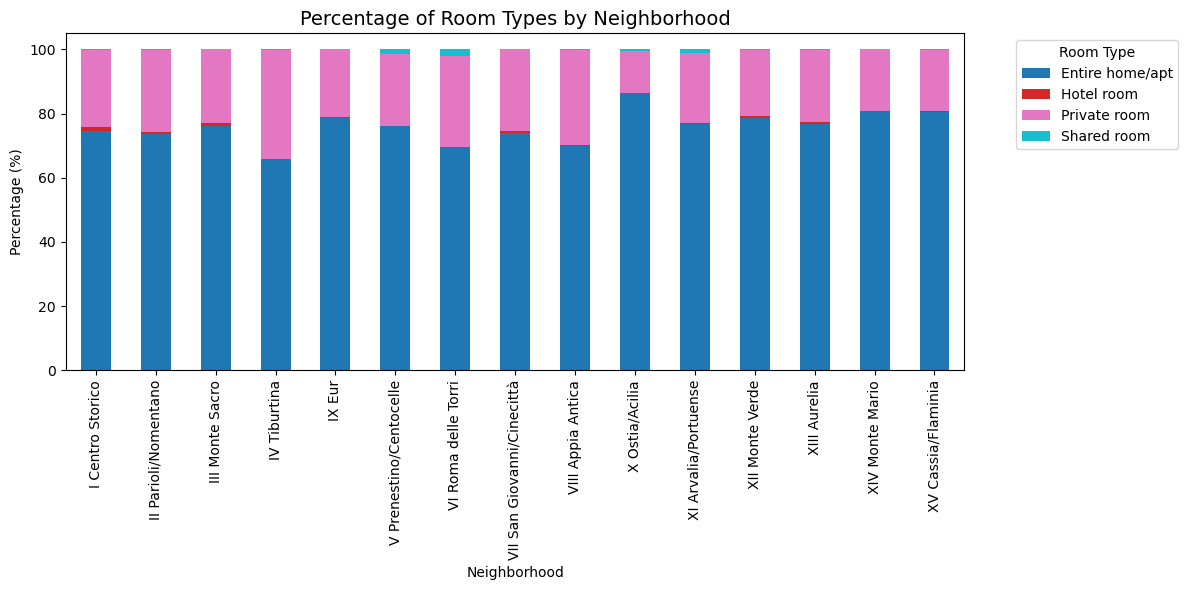

In [50]:
ax = df_listings_type.plot(
    kind='bar',
    stacked=True,
    figsize=(12,6),
    cmap="tab10"
)

plt.title("Percentage of Room Types by Neighborhood", fontsize=14)
plt.ylabel("Percentage (%)")
plt.xlabel("Neighborhood")
plt.legend(title='Room Type', bbox_to_anchor=(1.05, 1), loc='upper left') # Move legend outside
plt.tight_layout()
plt.savefig("2-1.png")
plt.show()

In [51]:
df_listings_renter_type = df_listings["renter_type"].value_counts()
df_listings_renter_type

renter_type
business    22485
casual      15167
Name: count, dtype: int64

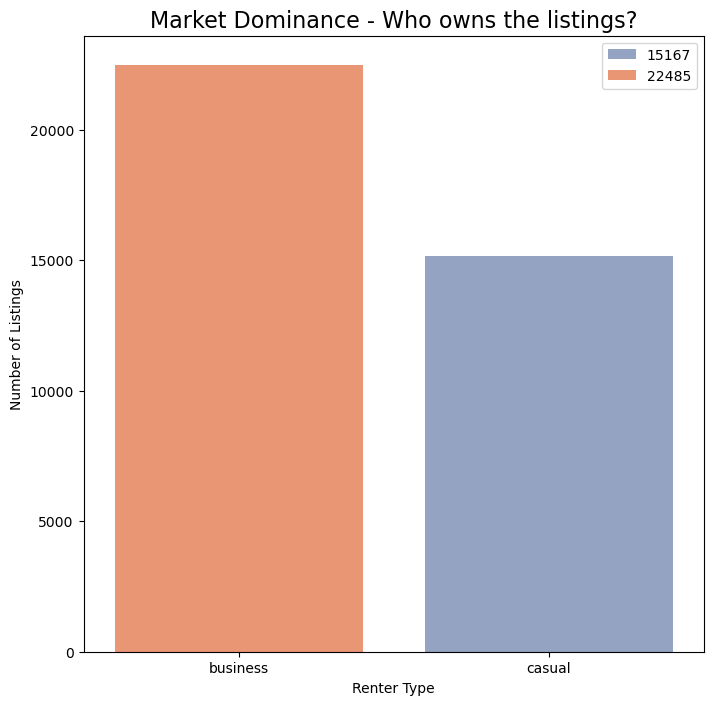

In [52]:
plt.figure(figsize=(8, 8))
colors = ['#8da0cb', '#fc8d62']

sns.barplot(
    x=df_listings_renter_type.index, 
    y=df_listings_renter_type.values, 
    palette=colors,
    hue=df_listings_renter_type.values,
    order=["business", "casual"]
)

plt.xlabel("Renter Type")
plt.ylabel("Number of Listings")
plt.title('Market Dominance - Who owns the listings?', fontsize=16)
plt.savefig("2-2.png")
plt.show()

In [53]:
# plt.figure(figsize=(8, 8))

# # We use countplot because we are counting how many listings belong to each group
# ax = sns.countplot(
#     data=df_listings, 
#     x='renter_type', 
#     order=["business", "casual"],
#     hue='renter_type',
#     palette=colors,
#     legend=False
# )

In [54]:
df_listings_renter_type = df_listings.drop_duplicates(subset=['host_id'])
df_listings_renter_type = df_listings_renter_type["renter_type"].value_counts()
df_listings_renter_type

renter_type
casual      15167
business     5356
Name: count, dtype: int64

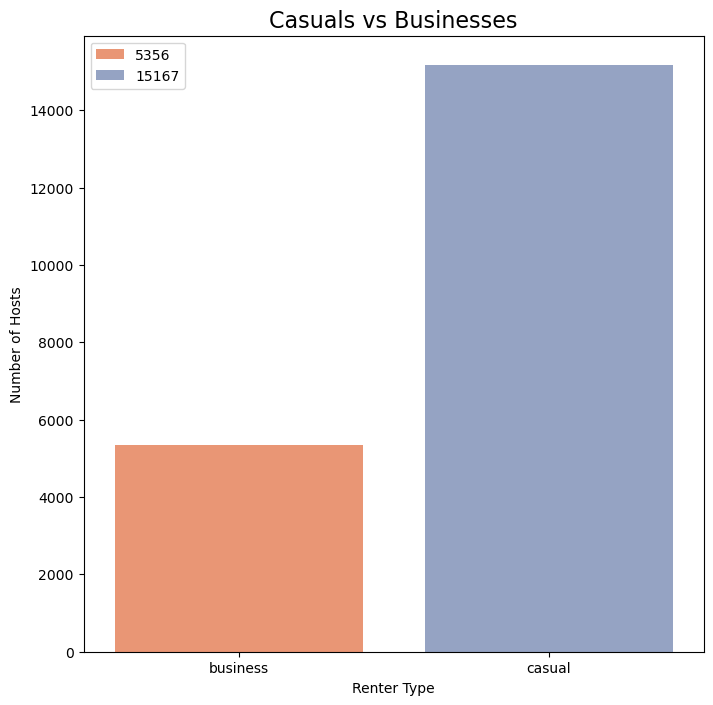

In [55]:
plt.figure(figsize=(8, 8))

colors = ['#fc8d62', '#8da0cb']

sns.barplot(
    x=df_listings_renter_type.index, 
    y=df_listings_renter_type.values, 
    palette=colors,
    hue=df_listings_renter_type.values,
    order=["business", "casual"]
)

plt.xlabel("Renter Type")
plt.ylabel("Number of Hosts")
plt.title('Casuals vs Businesses', fontsize=16)
plt.savefig("2-3.png")
plt.show()

## 3. How does host type correlate with availability and legal compliance?

In [56]:
df_listings["has_license"] = df_listings["license"].notna()
df_listings[["id", "name", "host_id", "host_name", "license", "has_license"]]

,id,name,host_id,host_name,license,has_license
0,2737,"Elif's room in cozy, clean flat.",3047,Elif,NaN,False
1,11834,"Charming Boschetto Studio, Rome",44552,Serena,IT058091C29VJSIZQZ,True
2,12398,Casa Donatello - Home far from Home,11756,Gea,it058091c2kv6epw8f,True
3,19965,S. Peter's Square 5 Min WALK bright and quite ...,75450,Sabrina,IT058091C20YD35BX2,True
4,19967,*In front Vatican Museums 2 bedrooms quite bri...,75450,Sabrina,IT058091C20YD35BX2,True
...,...,...,...,...,...,...
37647,1508816683242128286,Residence Apartment Lucky Stars,554023719,Lucky,IT058091B4XPH449TB,True
37648,1509264731966854270,The Quirinale apartment,718755020,David,IT058091C2RGTLCJNR,True
37649,1509322278066021169,"Appartamento 3 camere, 3 bagni, balconi e cucina",9403439,Andrea,IT058091C2DZHIDY6A,True
37650,1509392114869132219,appartamento residenziale,579802615,Domenico,it058091c2rf3ps25z,True


In [57]:
df_listings_license = round(df_listings.groupby(by="renter_type")["has_license"].mean() * 100, 3)
df_listings_license

renter_type
business    93.520
casual      89.411
Name: has_license, dtype: float64

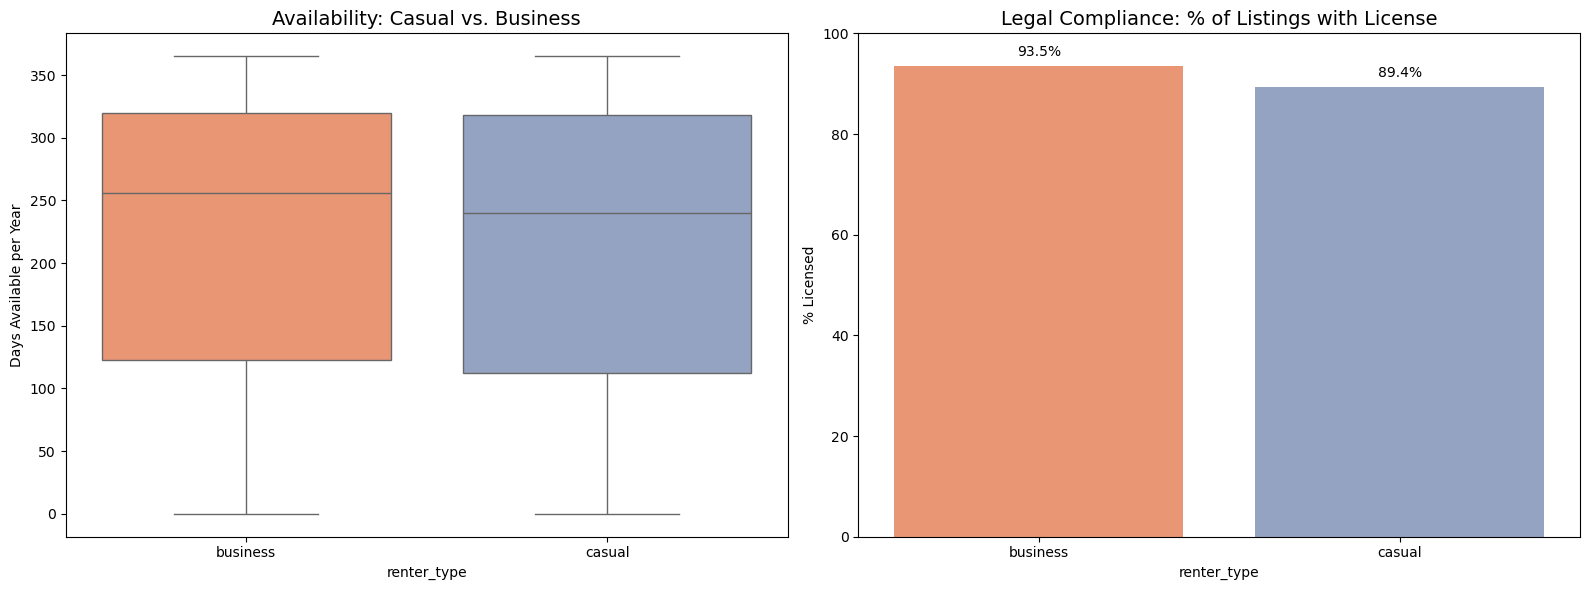

In [58]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
colors = ['#fc8d62', '#8da0cb']

# Plot Availability
sns.boxplot(
    data=df_listings, 
    x='renter_type', 
    y='availability_365', 
    ax=axes[0], 
    palette=colors,
    hue='renter_type',
    order=['business', 'casual'],
)
axes[0].set_title("Availability: Casual vs. Business", fontsize=14)
axes[0].set_ylabel("Days Available per Year")

# Plot Legal Compliance
sns.barplot(
    x=df_listings_license.index, 
    y=df_listings_license.values, 
    ax=axes[1], 
    palette=colors,
    hue=df_listings_license.index,
    order=['business', 'casual']
)
axes[1].set_title("Legal Compliance: % of Listings with License", fontsize=14)
axes[1].set_ylabel("% Licensed")
axes[1].set_ylim(0, 100)

for i, p in enumerate(df_listings_license):
    axes[1].text(i, p + 2, f'{p:.1f}%', ha='center')

plt.tight_layout()
plt.savefig("3-1.png")
plt.show()